# Does Social Progress Relate To Happiness?

## Project 1: Nick Buller, Kerry Harp, Sofanit Mengesha, Christopher Pope

### Hypothesis

There is a positive relationship (correlation) between the Happiness Score and the Social Progress Index (score).

- We assume "Basic Human Needs" is the greatest Social Progress indicator that predicts Happiness.

- We assume "Healthy Life Expectancy" is the greatest Happiness indicator that predicts Social Progress Score

- We assume a high population density correlates to high scores in both SP and HS.


World Happiness Report (https://worldhappiness.report/)

Social Progress Index (https://www.socialprogress.org/)

Population Density (https://population.un.org/wpp/Download/Standard/Population/)

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json

In [2]:
#suppress warning
import warnings
warnings.simplefilter("ignore")

In [3]:
#file path
#Import clean csv file
project_df_path = "Data/merge.csv"
project_df = pd.read_csv(project_df_path)
project_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,90.3,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,87.6,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,88.5,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,88.5,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,88.7,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077


Social Progress Index: Basic Human Needs, Foundations of Well-being, Opportunity
    
Happiness Score: GDP per Capita, Social Support, Healthy Life Expentancy, Freedom to Make Life Choices, Generosity, Perceptions of Corruption


Over the 5 years that were analyzed (2015-2019), the Happiness Score had up to 156 countries participating and the Social Progress Index had up to 192. After data from both was merged and cleaned up, 76 countries make up the participation in both the Happiness Score and the Social Progress Index.

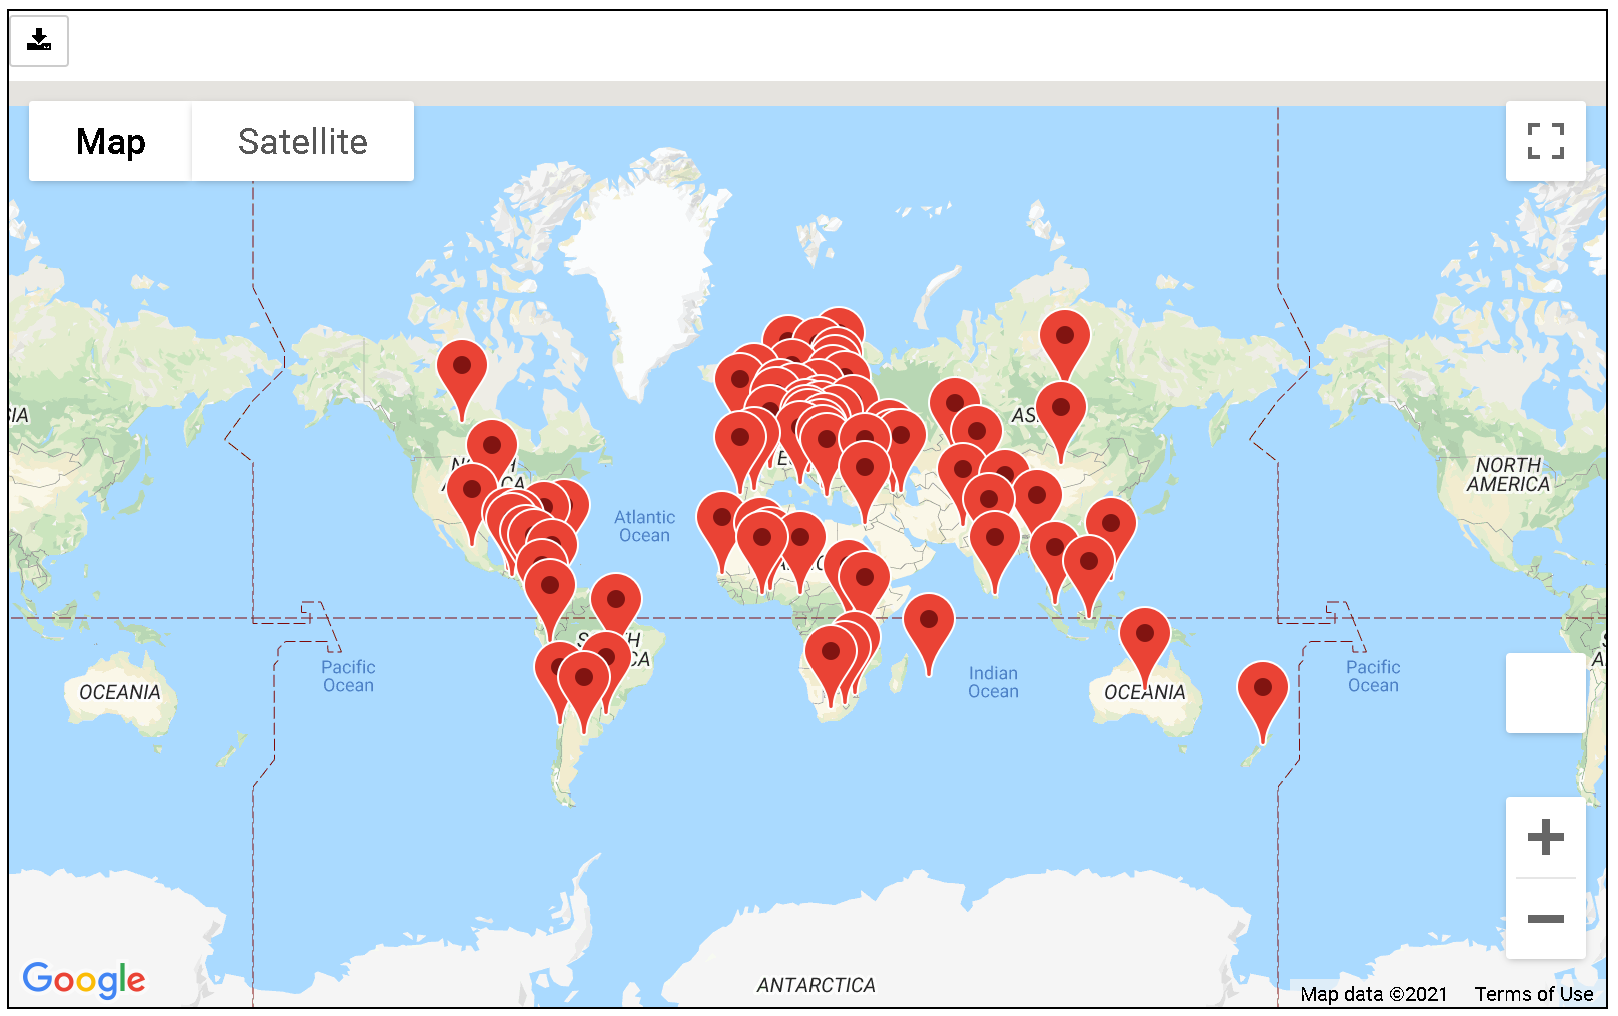

# The Social Progress Index Score and Happiness Score have a positive correlation

In [4]:
#Export CSV for participating countries
map_locations = project_df["Country or region_HS"].unique()
#map_locations

In [5]:
#Get ranking and totals data
totals_df = project_df[['Year_HS', 'Country_SP', 'Overall rank_HS', 'Score_HS', 'SPI Rank_SP',  'Social Progress Index_SP']]

#Rename year and country columns
totals_df.rename(columns = {"Year_HS":"Year", "Country_SP":"Country"}, inplace = True)

#configure SPI ranking to not have a decimal
totals_df["SPI Rank_SP"] = totals_df["SPI Rank_SP"].astype(int)

#renaming columns to get rid of spaces
totals_df.rename(columns={"Overall rank_HS":"Rank_HS"}, inplace=True)
totals_df.rename(columns={"SPI Rank_SP":"Rank_SPI"}, inplace=True)
totals_df.rename(columns={"Social Progress Index_SP":"Score_SPI"}, inplace=True)

## 2015-2019 Average Scores

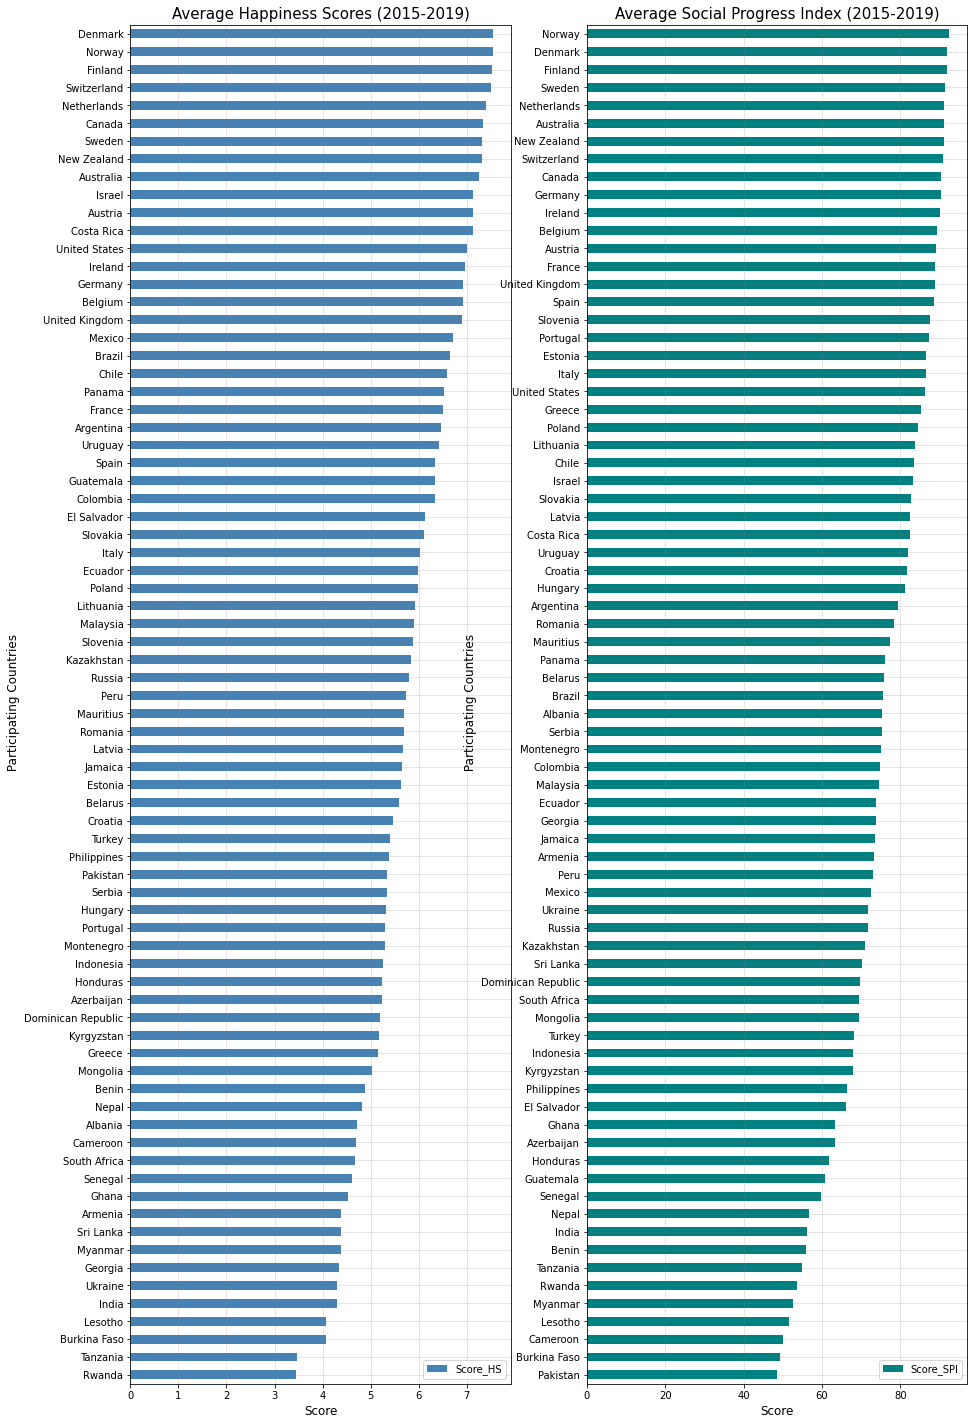

In [6]:
#Charting average of each country of countries
scores_df = totals_df[["Country", "Score_HS", "Score_SPI"]]

#Group by country
scoresgroup_df = scores_df.groupby("Country")
scores_all = scoresgroup_df.mean()

#Plot Happiness Score
HS_df = totals_df.groupby(["Country"])["Score_HS"].mean().reset_index()
ax = plt.subplot(1,2,1)
HS_plot = HS_df.sort_values(["Score_HS"], ascending=True).plot(kind="barh", y="Score_HS", x="Country", figsize=(15,25), color="steelblue", ax=ax)

plt.title("Average Happiness Scores (2015-2019)", fontsize=15)
plt.ylabel(" Participating Countries", fontsize=12)
plt.xlabel("Score", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#Plot Social Progress Index
SP_df = totals_df.groupby(["Country"])["Score_SPI"].mean().reset_index()
ax = plt.subplot(1,2,2)
SP_plot = SP_df.sort_values(["Score_SPI"], ascending=True).plot(kind="barh", y="Score_SPI", x="Country", figsize=(15,25), color="teal", ax=ax)

plt.title("Average Social Progress Index (2015-2019)", fontsize=15)
plt.ylabel(" Participating Countries", fontsize=12)
plt.xlabel("Score", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#plt.savefig("Data/AverageScores.png")
plt.show()

## Do the two systems correlate?

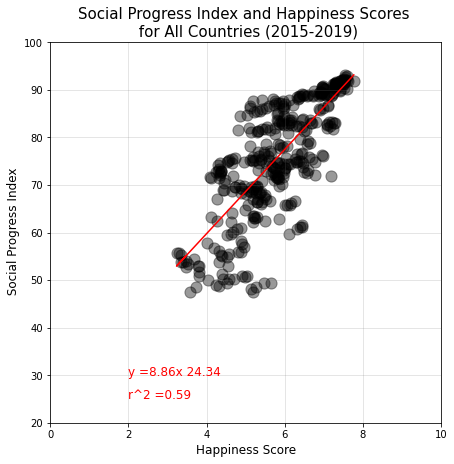

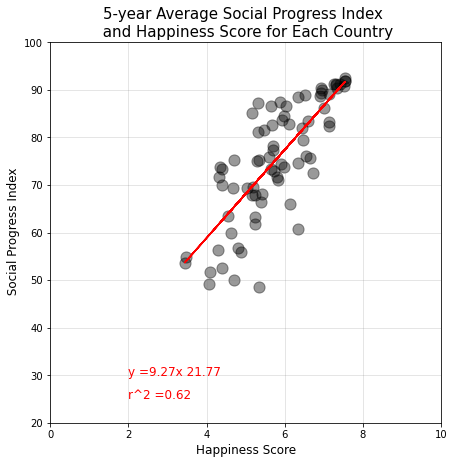

In [7]:
#Scatterplot all years, all countries
x_values = totals_df["Score_HS"]
y_values = totals_df["Score_SPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))
r2_eq = "r^2 =" + str(round(rvalue**2,2))

plt.rcParams["figure.figsize"] = (7,7)
plt.title("Social Progress Index and Happiness Scores \n for All Countries (2015-2019)",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")
plt.annotate(r2_eq, (2,25), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o", alpha=0.4, s=125 )
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_scatter.png")
plt.show()

#Scatterplot averaged scores, all countries
#Group by country
grouped_totals_df = totals_df.groupby(["Country"])
#grouped_totals_df.mean()

#Converting groupby to a dataframe
averages_df = pd.DataFrame(grouped_totals_df["Rank_HS", "Score_HS", "Rank_SPI", "Score_SPI"].mean())

#Scatterplot and annotate averaged data 
x_values = averages_df["Score_HS"]
y_values = averages_df["Score_SPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))
r2_eq = "r^2 =" + str(round(rvalue**2,2))

plt.rcParams["figure.figsize"] = (7,7)
plt.title("5-year Average Social Progress Index \n and Happiness Score for Each Country",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")
plt.annotate(r2_eq, (2,25), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o",  alpha=0.4, s=125)
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_average_scatter")
plt.show()

Null Hypothesis - The r-value is negative and the r^2-value is less than 0.5

Given that the slope is positive and the r^2-values are higher than 0.5, we have failed to disprove the hypothesis that the Social Progress Index and the Happiness Score have a positive correlation.

## Top of the Top 10

Countries that are ranked in the top 10 of BOTH the Happiness Score and the Social Progress Index (2015-2019).

- The Scandinavian countries consistently ranked the highest

- Location varies, but clustered in colder climates.

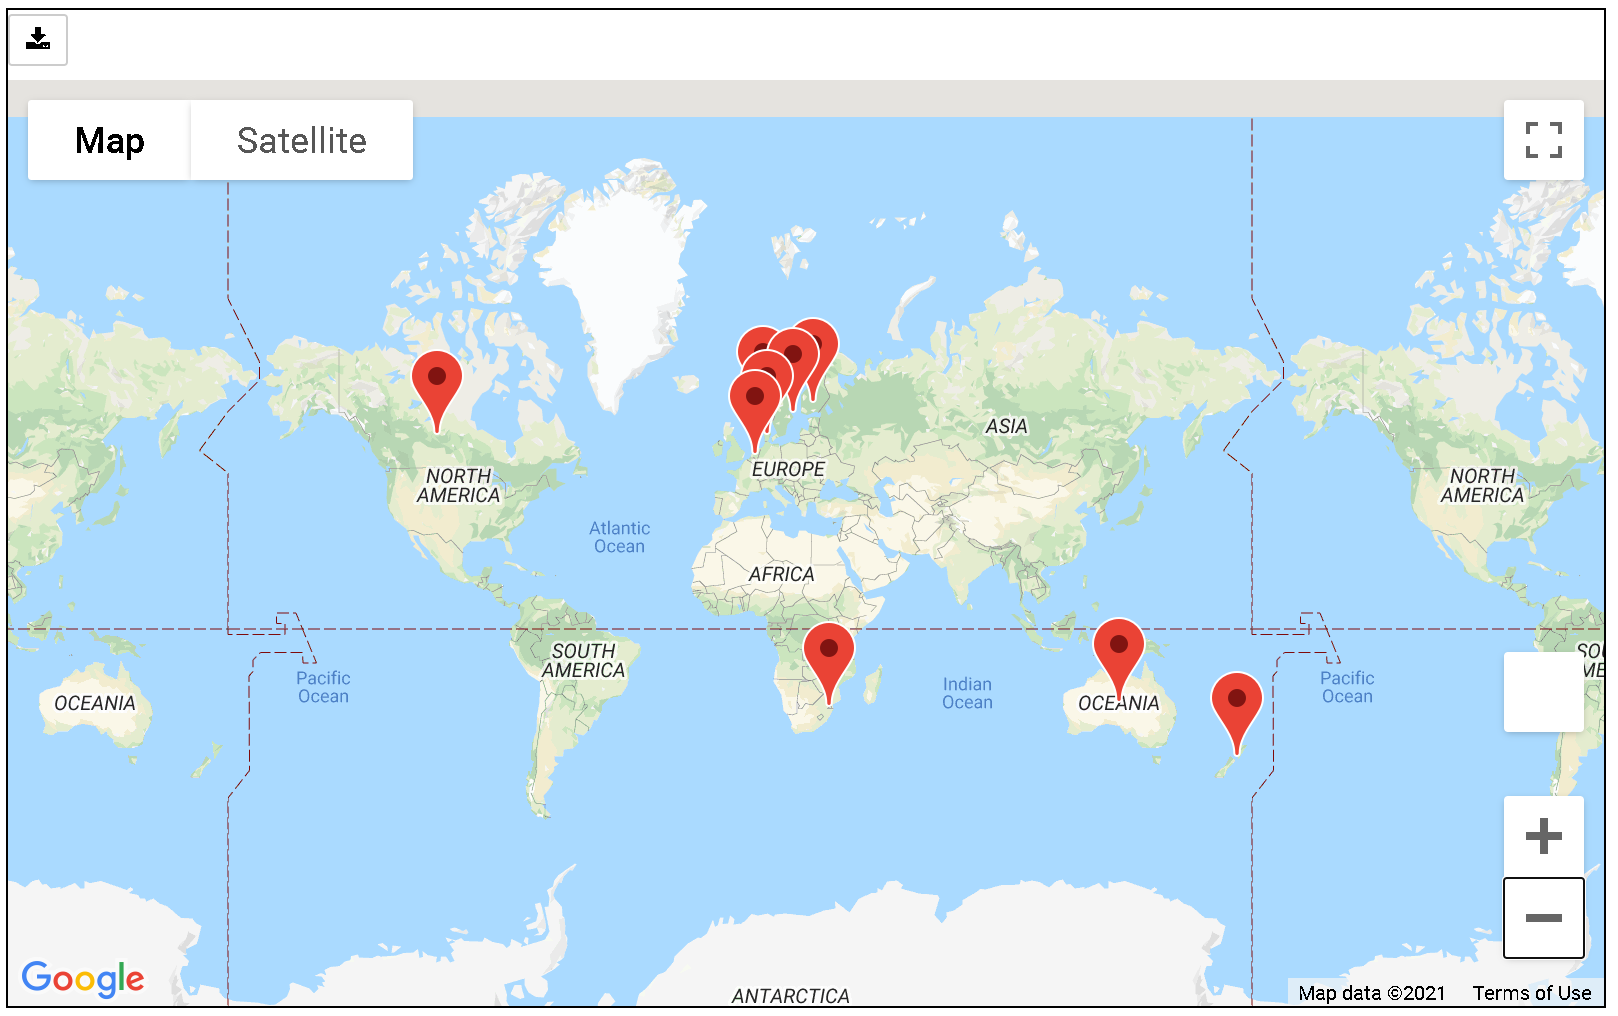

In [8]:
#Rankings of Happiness Score, grouped by year
ranking_HS = totals_df.groupby(["Country","Year"])
#ranking_HS = totals_df.sort_values(["Year","Score_HS"])
#ranking_HS.mean()

In [9]:
ranking_both_top10 = totals_df[(totals_df["Rank_HS"] <= 10) & (totals_df["Rank_SPI"] <= 10)]
#use \ (vertical bar for either condiation)


In [10]:
ranking_HS = ranking_both_top10.sort_values(["Rank_HS"])
ranking_SPI = ranking_both_top10.sort_values(["Rank_SPI"])
ranking_country = ranking_both_top10.sort_values(["Country"])
ranking_top10 = ranking_both_top10.groupby(["Country","Rank_HS","Rank_SPI"])
count10 = ranking_top10["Rank_SPI"].count()

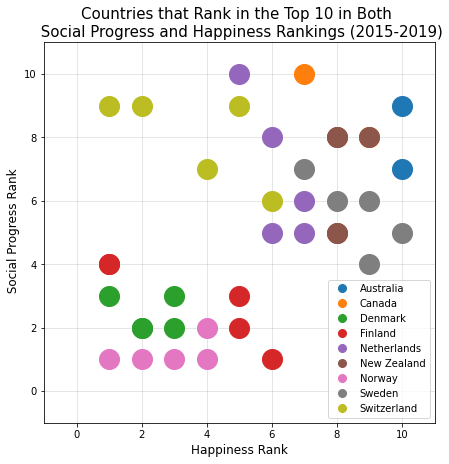

In [11]:
groups = ranking_country.groupby("Country")
colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}

for name, group in groups:
    plt.plot(group["Rank_HS"], group["Rank_SPI"], marker="o", markersize=20, linestyle="", label=name,)

plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["legend.markerscale"] = 0.4

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.legend()

#plt.savefig("Data/TopTenRanking-alternate.png")
plt.show()

This plot did not represent all the information wanted. It was done again using a different method which allowed customization of the colors of the dots (coldest climate is blue --> hotest climate is red), and the size of the dots to represent the best of the two rankings combined (ie: lower the sum of the two scores, the bigger the dot). Unfortunately, there was a problem in getting the legend to display correctly. I believe the issue was that I converted all the plot data to lists, for that is the only way I could figure out how to customized the color per country.  Visually, this is the preferred plot.

In [12]:
#Create variable for list of ranking data
plot_HS_rank = ranking_country["Rank_HS"].to_list()

plot_SPI_rank = ranking_country["Rank_SPI"].to_list()

country = ranking_country["Country"].to_list()

#Create variable to add and inverse the rankings so the smallest number for the ranking displays a larger dot using list comprehension.
#https://www.geeksforgeeks.org/python-adding-two-list-elements/
#display_dot = [plot_HS_rank[i] + plot_SPI_rank[i] for i in range(len(plot_HS_rank))]

display_dot = [float(plot_HS_rank[i]) + float(plot_SPI_rank[i]) for i in range(len(plot_HS_rank))]

#Find reciprocal
#https://www.geeksforgeeks.org/numpy-reciprocal
display_dot_inv = np.reciprocal(display_dot)

#display_dot
#display_dot_inv

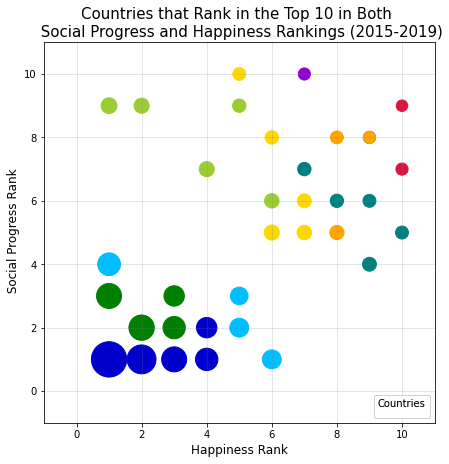

In [13]:
#Scatterplot of the two rankings with cities that rank 1-10 in both.
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
#https://python-graph-gallery.com/270-basic-bubble-plot/
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
    
df = pd.DataFrame(dict(plot_HS_rank=plot_HS_rank, plot_SPI_rank=plot_SPI_rank, country=country, display_dot_inv=display_dot_inv))
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7,7)

colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}
scatter = ax.scatter(df['plot_HS_rank'], df['plot_SPI_rank'], s=df['display_dot_inv']*2500, c=df['country'].apply(lambda x: colors[x]))

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Countries")
ax.add_artist(legend1)

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

plt.savefig("Data/TopTenRanking.png")
plt.show()

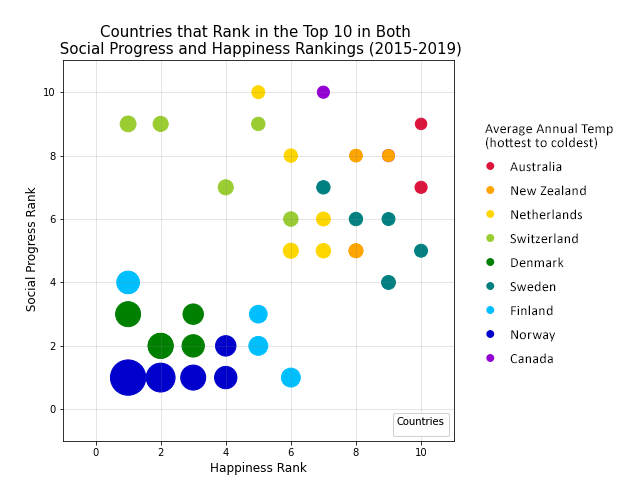

# Analysis of Relationships between Social Progress Indicators and Happiness Score

The hypothesis for this data set is that basic needs would be the strongest Social Progress Indicator of happiness.

### Basic Human Needs vs. Happiness Linear Regression

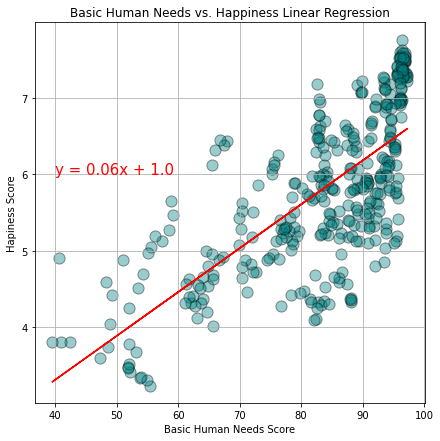

In [14]:
# Add the linear regression equation and line to plot
y_values = project_df['Score_HS']
x_values = project_df['Basic Human Needs_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black", color="teal", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,6),fontsize=15,color="red")

# Labels
plt.title('Basic Human Needs vs. Happiness Linear Regression')
plt.ylabel('Hapiness Score')
plt.xlabel('Basic Human Needs Score')
plt.grid()
plt.show()

In [15]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7203380281808829.  This is a strong positive relationship


### Foundations of Wellbeing vs Happiness Linear Regression

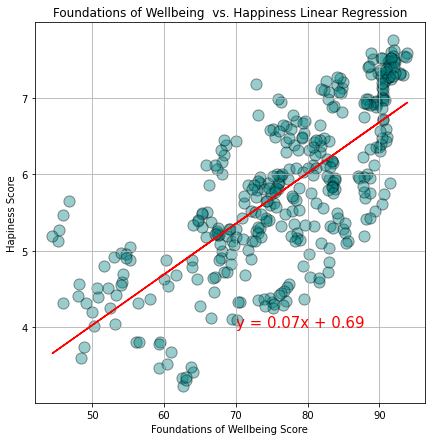

In [16]:
# Add the linear regression equation and line to plot
y_values = project_df['Score_HS']
x_values = project_df['Foundations of Wellbeing_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black", color="teal", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,4),fontsize=15,color="red")

# Labels
plt.title('Foundations of Wellbeing  vs. Happiness Linear Regression')
plt.ylabel('Hapiness Score')
plt.xlabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [17]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7375901602991619.  This is a strong positive relationship


### Opportunity vs. Happiness Linear Regression

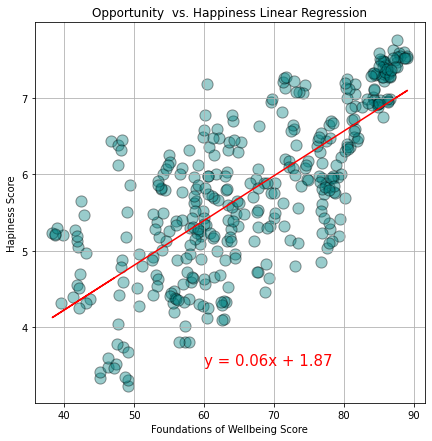

In [18]:
# Add the linear regression equation and line to plot
y_values = project_df['Score_HS']
x_values = project_df['Opportunity_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black", color="teal", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,3.5),fontsize=15,color="red")

# Labels
plt.title('Opportunity  vs. Happiness Linear Regression')
plt.ylabel('Hapiness Score')
plt.xlabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [19]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7422322467871909.  This is a strong positive relationship


### Happiness Score Linear Regression Analysis

Each of the r-values found in this analysis showed a strong positive correlation of around .73-.74.  

This shows us that Basic Human Needs, Foundations of Wellness, and Opportunity (as defined by the Social Progress Index) all increases while happiness increases.  

This means that the hypothesis was disproved because Basic Needs was not the strongest and was noticeably similar to the other indicators.

A further analysis to find more interesting correlations in the data was conducted below by looking at all Social Progress Indicators instead of just the high level categories looked at here.

# Finding Social Progress Indicator Sub-metrics with Strongest Correlation to Happiness Score

In [20]:
# Create lists for storage of information
sub_metric_list = []
rvalue_list = []

# Select only columns relating to Social Progress Indicators
submetric_df = project_df.iloc[:, 22:84]

# Iterate through the submetric data frame and store rvalues and submetric label for each
for column in submetric_df:
    submetric_string = column[:-3]
    y_values = project_df['Score_HS']
    x_values = project_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    sub_metric_list.append(submetric_string)
    rvalue_list.append(rvalue)
    
# Store lists in a dictionary
submetric_results_dict = {
    'Sub Metric' : sub_metric_list,
    'R Value' : rvalue_list
}

# Create a dataframe with the dictionary
submetric_results_df = pd.DataFrame(data = submetric_results_dict)

### Positive Relationship Results

In [21]:
positive_results_df = submetric_results_df.loc[submetric_results_df['R Value'] >= 0]
weak_pos_results_df = positive_results_df.sort_values(by=['R Value'])
strong_pos_results_df = positive_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Positive Indicators of Happiness</b>

In [22]:
strong_pos_results_df.head()

,Sub Metric,R Value
38,Life expectancy at 60 (years),0.774387
4,Access to Information and Communications,0.759601
5,Health and Wellness,0.754358
56,Acceptance of gays and lesbians (0=low; 100=high),0.753401
8,Personal Freedom and Choice,0.746031


<b>Weakest Positive Indicators of Happiness</b>

In [23]:
weak_pos_results_df.head()

,Sub Metric,R Value
39,Greenhouse gas emissions (total CO2 equivalents),0.119274
41,Biome protection,0.215574
57,Quality weighted universities (points),0.282349
45,Freedom of religion (0=no freedom; 4=full free...,0.324060
34,Mobile telephone subscriptions (subscriptions/...,0.336811


### Negative Relationship Results

In [24]:
negative_results_df = submetric_results_df.loc[submetric_results_df['R Value'] < 0]
strong_neg_results_df = negative_results_df.sort_values(by=['R Value'])
weak_neg_results_df = negative_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Negative Indicators of Happiness</b>

In [25]:
strong_neg_results_df.head()

,Sub Metric,R Value
21,Household air pollution attributable deaths (d...,-0.757515
18,Populations using unsafe or unimproved sanitat...,-0.711743
48,Vulnerable employment (% of employees),-0.672860
17,Populations using unsafe or unimproved water s...,-0.664992
13,Child stunting (% of children),-0.655595


<b>Weakest Negative Indicators of Happiness</b>

In [26]:
weak_neg_results_df.head()

,Sub Metric,R Value
25,"Homicide rate (deaths/100,000)",-0.070222
24,Perceived criminality (1=low; 5=high),-0.352443
50,Early marriage (% of women),-0.384361
27,Women with no schooling,-0.410188
55,Discrimination and violence against minorities...,-0.417835


### Analysis of Sub-metric Linear Regressions

The 3 metrics with the strongest positive correlation with happiness scores are:
- Life Expectency at 60
- Access to information and communications
- Overall Health and Wellness of the country

The 3 metrics with the strongest negative correlation with happiness scores are:
- Household air pollution attributable deaths
- Populations (%) using unsafe or unimproved sanitation
- Vulnerable employment (% of employees)

The 3 metrics with the weakest positive correlation with happiness scores are:
- Greenhouse gas emissions
- Biome protection
- Quality universities

The 3 metrics with the weakest negative correlation with happiness scores are:
- Homicide rate
- Perceived criminality
- Early marriage (% of women)

From this, our final step was to take the 3 strongest metrics and see how well they could be used to predict happiness score in a single variable linear regression.

In [27]:
# r squared of Life Expectency and Happiness Score
y_values = project_df['Score_HS']
x_values = project_df['Life expectancy at 60 (years)_SP']
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f"The r_squared for Life Expectency and Happiness Score is {r_squared}")
print("")

# r squared of Access to Information and Communications
y_values = project_df['Score_HS']
x_values = project_df['Access to Information and Communications_SP']
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f"The r_squared for Access to Information and Communications and Happiness Score is {r_squared}")
print("")

# r squared of Household air pollution attributable deaths and Happiness Score
y_values = project_df['Score_HS']
x_values = project_df['Household air pollution attributable deaths (deaths/100,000)_SP']
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f"The r_squared for Household air pollution attributable deaths and Happiness Score is {r_squared}")
print("")

The r_squared for Life Expectency and Happiness Score is 0.5996749974437965

The r_squared for Access to Information and Communications and Happiness Score is 0.5769931124010349

The r_squared for Household air pollution attributable deaths and Happiness Score is 0.57382828545259



The above shows each of these strongly correlated values has an r-squared of above .57. 

This means each of these variables can attribute to predicting at least 57% of the value of the Happiness Score, given a single variable linear regression model, with the other 43% (or less) of the value being attributable to other factors. 

# Analysis of Relationships between Happiness Indicators and Social Progress Score

The hypothesis for this data set is that the Healthy Life Expectancy is the greatest Happiness Score indicator that predicts Social Progress Index.

## First Parameter GDP per Capita

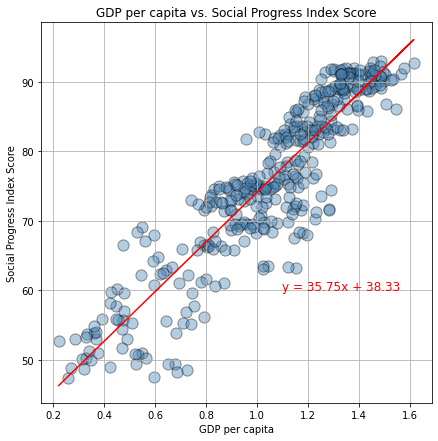

In [28]:
# Add the linear regression equation and line to plot
x_values = project_df['GDP per capita_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black", color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 1.1, 60),fontsize=12,color="red")

# Labels
plt.title('GDP per capita vs. Social Progress Index Score')
plt.xlabel('GDP per capita')
plt.ylabel('Social Progress Index Score')
plt.grid()

plt.show()

In [29]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.911455180675344.  This is a strong positive relationship


In [30]:
x_values = project_df['GDP per capita_HS']
y_values = project_df['Social Progress Index_SP']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

#print(r_squared)
print (f"The R^2 value for GDP per Capita is: {r_squared}. GDP per capita is the highest happiness indicator that predicts social progress score." )

The R^2 value for GDP per Capita is: 0.8307505463799244. GDP per capita is the highest happiness indicator that predicts social progress score.


There is a strong positive relationship between GDP per capita and Social Progress Index score, therefore as the GDP of the countries increase the Social Progress Index will also increase and vice versa.

## Second Parameter Social Support

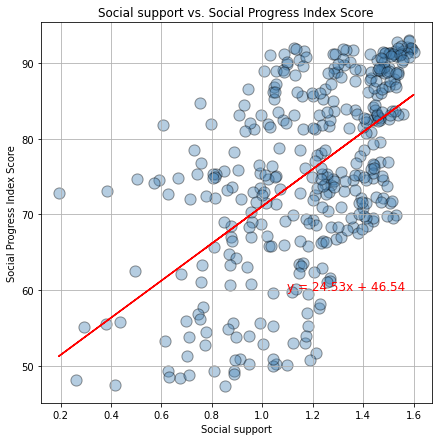

In [31]:
# Add the linear regression equation and line to plot
x_values = project_df['Social support_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black",  color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 1.1, 60),fontsize=12,color="red")

# Labels
plt.title('Social support vs. Social Progress Index Score')
plt.xlabel('Social support')
plt.ylabel('Social Progress Index Score')
plt.grid()
plt.show()

In [32]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.5689831985032235.  This is a moderate positive relationship


In [33]:
x_values = project_df['Social support_HS']
y_values = project_df['Social Progress Index_SP']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

#print(r_squared)
print (f"The R^2 value for Social support is: {r_squared}. Social support is the third highest happiness indicator that predicts Social Progress score" )

The R^2 value for Social support is: 0.32374188017895883. Social support is the third highest happiness indicator that predicts Social Progress score


There is a moderate positive relationship between Social support of countries and Social Progress index score, therefore whenever the social support increase the social progress index score of the respective countries increases moderately. And vice versa.

## Third Parameter Healthy Life Expectancy

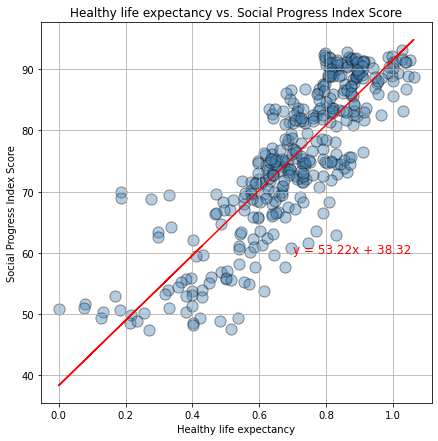

In [34]:
# Add the linear regression equation and line to plot
x_values = project_df['Healthy life expectancy_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black",  color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 0.7, 60),fontsize=12,color="red")

# Labels
plt.title('Healthy life expectancy vs. Social Progress Index Score')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Social Progress Index Score')
plt.grid()
plt.show()

In [35]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")


The r value is: 0.8435154352360167.  This is a strong positive relationship


In [36]:
x_values = project_df['Healthy life expectancy_HS']
y_values = project_df['Social Progress Index_SP']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

#print(r_squared)
print (f"The R^2 value for Healthy life expectancy is: {r_squared}. Healthy life expectancy is the second highest happiness indicator that predicts social progress score." )


The R^2 value for Healthy life expectancy is: 0.7115182894814065. Healthy life expectancy is the second highest happiness indicator that predicts social progress score.


## Fourth Parameter Freedom to Make Life Choices

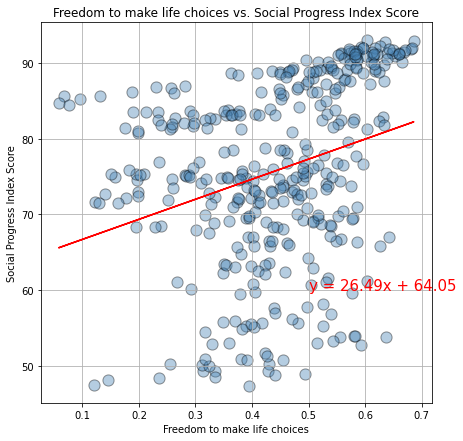

In [37]:
# Add the linear regression equation and line to plot
x_values = project_df['Freedom to make life choices_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black",  color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 0.5, 60),fontsize=15,color="red")

# Labels
plt.title('Freedom to make life choices vs. Social Progress Index Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Social Progress Index Score')
plt.grid()
plt.show()

In [38]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .2 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.2936232091582708.  This is a weak positive relationship


There is a weak positive correlation between Freedom to make life choices and Social progress Index Score, therefore freedom to make life choices does not affect Social Progress Index.

## Fifth Parameter Generosity

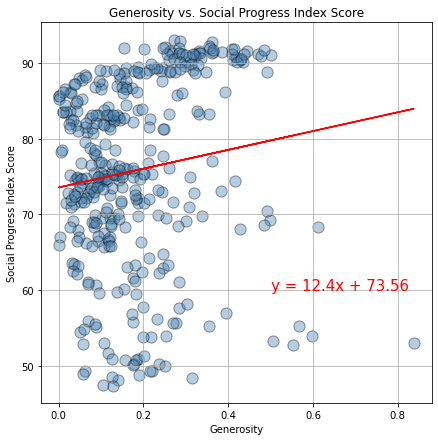

In [39]:
# Add the linear regression equation and line to plot
x_values = project_df['Generosity_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black",  color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 0.5, 60),fontsize=15,color="red")

# Labels
plt.title('Generosity vs. Social Progress Index Score')
plt.xlabel('Generosity')
plt.ylabel('Social Progress Index Score')
plt.grid()
plt.show()

In [40]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .1 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.13167164781917073.  This is a weak positive relationship


## Sixth Parameter Perception of Corruption

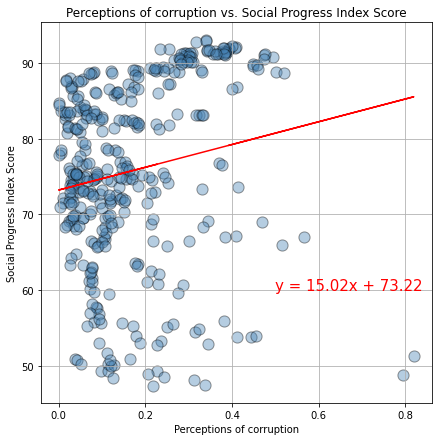

In [41]:
# Add the linear regression equation and line to plot
x_values = project_df['Perceptions of corruption_HS']
y_values = project_df['Social Progress Index_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black",  color="steelblue", alpha=0.4, s=125)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,( 0.5, 60),fontsize=15,color="red")

# Labels
plt.title('Perceptions of corruption vs. Social Progress Index Score')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Social Progress Index Score')
plt.grid()
plt.show()

In [42]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .1 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.16871305602529518.  This is a weak positive relationship


There is also a weak positive relationship between Perceptions of Corruption and Social Progress Score, therefore we can conclude and say that Social Progress Index of Countries will not be affected by Perceptions of Corruption.

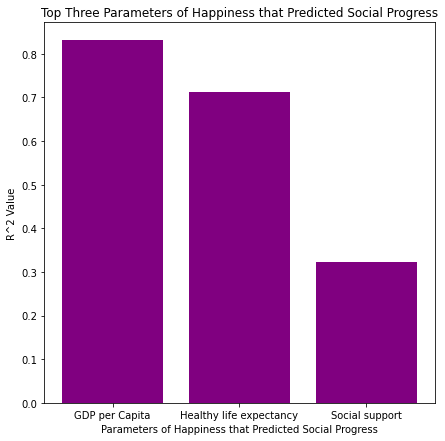

In [43]:
R_squared_labels = np.array(['GDP per Capita','Healthy life expectancy','Social support'])
R_squared_values = np.array([0.8307505463799246,0.7115182894814055,0.32374188017895883])
plt.bar(R_squared_labels,R_squared_values, color = "purple")
plt.title("Top Three Parameters of Happiness that Predicted Social Progress")
plt.xlabel("Parameters of Happiness that Predicted Social Progress")
plt.ylabel("R^2 Value")
plt.show()


Healthy life expectancy is one of top indicators of happiness that correlates with Social Progress Score, therefore we not fail to reject the null hypothesis.

# Analysis of the relationship between Population Density and Social Progress/ World Happiness

The hypothesis of this data set was that a denser population likely would have more innovation. 
- Greater innovation would lead to a greater Social Progress Index, which would in turn lead to a greater World Happiness Score.

In [44]:
#locate World Density fine
den_file = "Data/population_density.csv"

# Read our World Density data into pandas
density_df = pd.read_csv(den_file, encoding = "ISO-8859-1")
#density_df

In [45]:
# Only show density of specific countries
country_df = density_df.loc[density_df['Type'] == 'Country/Area']
rename_country = country_df.rename(columns={'Region, subregion, country or area *':'Country'})

# Break the data out by country and create seperate dataframe for years 2015 - 2019
clean_country = rename_country[['Country','2015', '2016', '2017', '2018', '2019']]
clean_country['Country'] = clean_country['Country'].replace({'United States of America':'United States'})
clean_country['Country'] = clean_country['Country'].replace({'United Republic of Tanzania':'Tanzania'})
clean_country['Country'] = clean_country['Country'].replace({'Russian Federation':'Russia'})
density_2015 = clean_country[['Country', '2015']]
density_2016 = clean_country[['Country', '2016']]
density_2017 = clean_country[['Country', '2017']]
density_2018 = clean_country[['Country', '2018']]
density_2019 = clean_country[['Country', '2019']]
#density_2019.head()

In [46]:
#Change each dataframes column label from the year of the datafile to "Population Density"
density_2015 = density_2015.rename(columns={'2015':'Population Density'})
density_2016 = density_2016.rename(columns={'2016':'Population Density'})
density_2017 = density_2017.rename(columns={'2017':'Population Density'})
density_2018 = density_2018.rename(columns={'2018':'Population Density'})
density_2019 = density_2019.rename(columns={'2019':'Population Density'})
#density_2019.loc[density_2019['Country'] == 'Russia']

In [47]:
# Create a column that puts the reads (The Year)+(The Country's name)
density_2015['Country & Year'] = ('2015')+density_2015['Country']
density_2016['Country & Year'] = ('2016')+density_2016['Country']
density_2017['Country & Year'] = ('2017')+density_2017['Country']
density_2018['Country & Year'] = ('2018')+density_2018['Country']
density_2019['Country & Year'] = ('2019')+density_2019['Country']

In [48]:
# append each of the dataframes above to each other so we have a combined dataframe from 2015-2019
v1 = density_2015.append(density_2016)
v2 = v1.append(density_2017)
v3 = v2.append(density_2018)
v4 = v3.append(density_2019)
#v4

In [49]:
#Merge the population density dataframe with the complete dataframe from above. Merge on "Country & Year"

new_merge = project_df
new_merge['Country & Year'] = new_merge["Year_HS"].astype(str) + new_merge["Country or region_HS"]

combined_merge = pd.merge(v4, new_merge, on="Country & Year", how='right')
#combined_merge

In [50]:
#Pull out a list for population density, happiness score & social progress index
pop_den = combined_merge['Population Density'].astype('float64')
hap_score = combined_merge['Score_HS'].astype('float64')
sp_index = combined_merge['Social Progress Index_SP'].astype('float64')

# Visual Analysis of the top 10 countries from each criteria

** If we take a moment to compare the 10 densest country graph with the graph of the 10 highest Happiness Scores or Social Progress Index scores we will find countries that appear in both.

If we compare the 10 Densest with the 10 highest happiness scores we will notice that these countries appear in both:
    - The Netherlands
    - Israel

If we compare the 10 Densest with the 10 highest Social Progress Index scores we will see that these countries appear in both:
    - Rwanda
    - India
    
With there being countries that appear in both of the cross analysis, that may be enough to hypothesize that there may be a correlation between the two datasets?

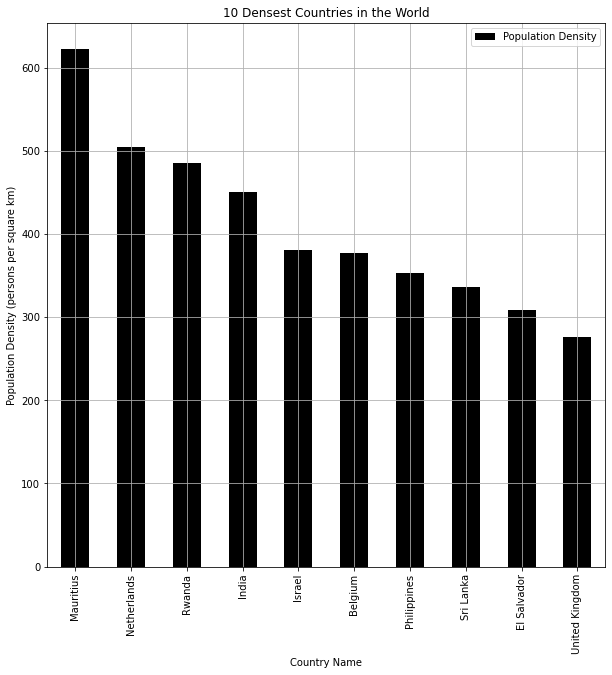

In [51]:
#Break each list into a column for country and a column for Density, Happiness Score or Social Progress Index 
den_reduce = combined_merge[["Country", "Population Density"]]
hs_reduce = combined_merge[["Country", "Score_HS"]]
sp_reduce = combined_merge[["Country", "SPI Rank_SP"]]

#Group Density by country
den_group = den_reduce.groupby("Country")
den_mean = den_group.mean()
sort_den = den_mean.sort_values('Population Density', ascending =False)
top_den = sort_den.loc[sort_den['Population Density'] > 270]



#Plot the 10 largest Density values by Country
top_den = top_den.plot(kind='bar', figsize=(10,10), color="black")

#Label the graph
plt.title('10 Densest Countries in the World')
plt.ylabel('Population Density (persons per square km)')
plt.xlabel('Country Name')

plt.grid()
plt.show()

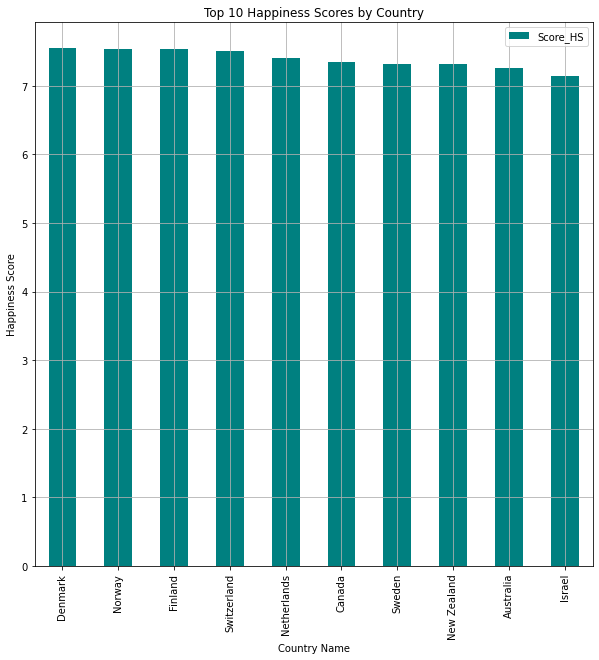

In [52]:
#Group Happiness by country
hs_group = hs_reduce.groupby("Country")
hs_mean = hs_group.mean()
sort_hs = hs_mean.sort_values('Score_HS', ascending =False)
top_hs = sort_hs.loc[sort_hs['Score_HS'] > 7.1421]

#Plot the 10 largest Happiness Score values by Country
top_hs = top_hs.plot(kind='bar', figsize=(10,10) , color="teal")

#Labels for the graph
plt.title('Top 10 Happiness Scores by Country')
plt.ylabel('Happiness Score')
plt.xlabel('Country Name')

plt.grid()
plt.show()

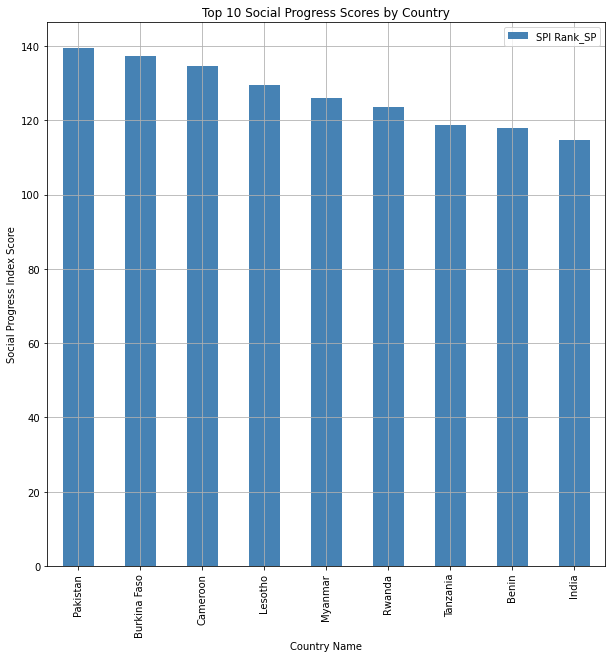

In [53]:
#Group Social Progress Index by country
sp_group = sp_reduce.groupby("Country")
sp_mean = sp_group.mean()
sort_sp = sp_mean.sort_values('SPI Rank_SP', ascending =False)
top_sp = sort_sp.loc[sort_sp['SPI Rank_SP'] > 114]

# Plot the 10 largest Social Progress Index Score values by Country
top_sp = top_sp.plot(kind='bar', figsize=(10,10), color="steelblue")

#Labels for the graph
plt.title('Top 10 Social Progress Scores by Country')
plt.ylabel('Social Progress Index Score')
plt.xlabel('Country Name')


plt.grid()
plt.show()

# Observations: Population Density Vs. Happiness Score

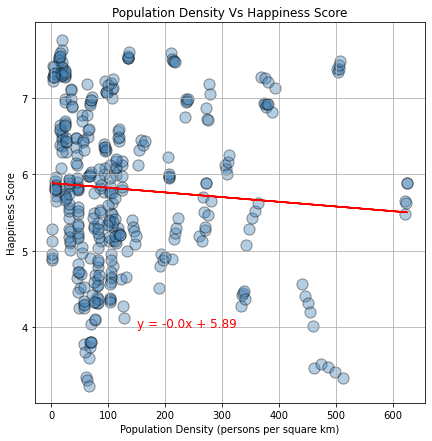

 The r Value is:-0.07628303439557019


In [54]:
#Plot a scatterplot of Population Density vs. Happiness score. Print the r value at the bottom of the graph

slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, hap_score)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, hap_score, edgecolors = 'black',color="steelblue", alpha=0.4, s=125)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(150,4),fontsize=12,color="red")
plt.title("Population Density Vs Happiness Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()
print(f" The r Value is:{rvalue}")

As we can see in the graph, the greatest collection of dots appear to be between x values 0 to 100. And if we look at those values specifically we can see that, the majority of dots lie between y values 4 to 7. Visually I could hypothesize that of the countries we compared, a countries population density does not seem to have an effect of its Happiness Score. The datasets r Value of -0.076 seems to confirm that hypothesis.

# Observations: Population Density Vs. Social Progress Index Score

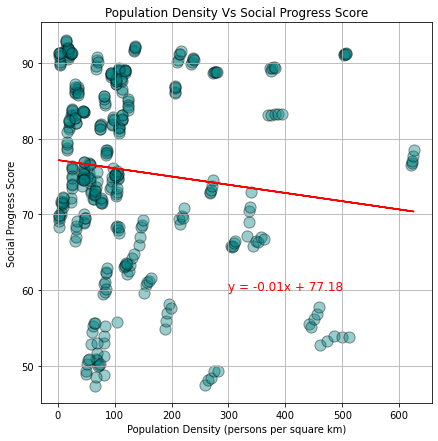

 The r Value is:-0.11723458156902701


In [55]:
#Plot a scatterplot of Population Density vs. Social Progress Index score. Print the r value at the bottom of the graph

slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, sp_index)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, sp_index, edgecolors = 'black', color="teal", alpha=0.4, s=125)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(300,60),fontsize=12,color="red")
plt.title("Population Density Vs Social Progress Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Social Progress Score")
plt.grid()
plt.show()
print(f" The r Value is:{rvalue}")

As we can see in the graph, the greatest collection of dots appear to be between x values 0 to 100. And if we look at those values specifically we can see that, the majority of dots lie between y values 50 to 90. Visually I could hypothesize that of the countries we compared, a countries population density does not seem to have an effect of its Social Progress Index Score. 

The datasets r Value of -0.117 seems to confirm that hypothesis.

Hypothesis of high population density correlates to high scores in both SP and HS was false due to a negative correlation.

# Main Take Aways:
We failed to disprove the following hypothesis:
- Social Progress Score and Happiness Score have a strong correlation

We disproved the following hypotheses:
- Basic Human Needs are the best predictor of Happiness Score (it was Opportunity)
- Life Expectancy is the best predictor of Social Progress Score (it was GDP)
- Population density has a positive correlation with Happiness Score and Social Progress Score (correlation was weak for both)

# Further Analysis
If we had the time/skill, we would have liked to look into the following:
- Conduct on multivariable regression analysis on both datasets (similar to our linear regression analyses.
- Determine what the US could do to best improve its Social Progress Score and Happiness Score.